In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-05-23 05:57:19--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-23 05:57:20--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-05-23 05:57:20 (3.91 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# Упражнение 2.1

Была проверена работа примеров в блокноте chap02.ipynb

# Упражнение 2.2

Был разработан класс **SawtoothSignal**, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала.

Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется.

In [2]:
from thinkdsp import Sinusoid, normalize, unbias
import math
PI2 = 2 * math.pi
import numpy as np

class SawtoothSignal(Sinusoid):
  def evaluate(self, ts):
    cycles = self.freq * ts + self.offset / PI2
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

cycles — число циклов со времени начала.

np.modf разделяет число циклов на дробную часть frac и целую часть, которая игнорируется.

frаc — это последовательность, растущая в пределах от 0 до 1 с заданной частотой.

unbias смещает сигнал так, что он центрируется по 0; затем normalize масштабирует его до заданной амплитуды amp.

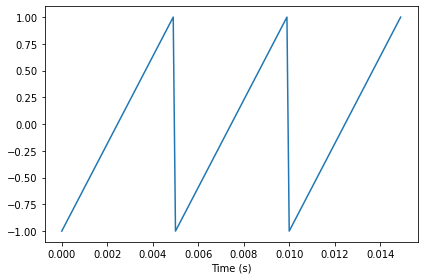

In [3]:
from thinkdsp import decorate
signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Был вычислен спектр пилообразного сигнала.

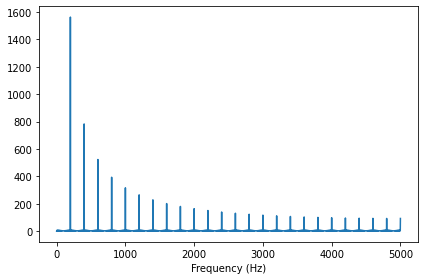

In [4]:
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

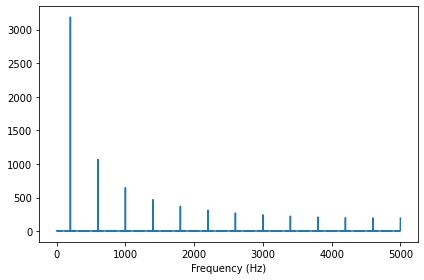

In [5]:
from thinkdsp import SquareSignal
signal = SquareSignal(200)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

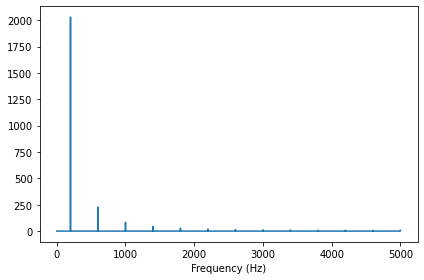

In [6]:
from thinkdsp import TriangleSignal
signal = TriangleSignal(200)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

В отличии от треугольного и прямоугольного сигнала, которые содержат только нечётные гармоники, пилообразный содержит и чётные, и нечётные.

Амплитуда гармоник пилообразного сигнала спадает пропорционально частоте, как и прямоугольный сигнал. Треугольный сигнал в отличии от них падает пропорционально квадрату частоты.

# Упражнение 2.3

Был создан прямоугольный сигнал 1100 Гц и вычислена wave с выборками 10 000 кадров в секунду.


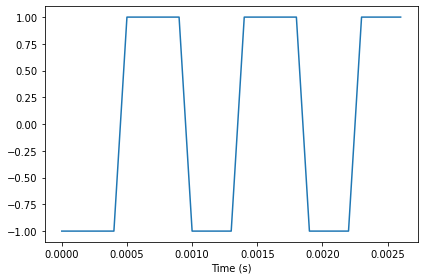

In [7]:
signal = SquareSignal(1100)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Был построен спектр. Убедились, в том, что
большинство гармоник «завернуты» из-за биений.

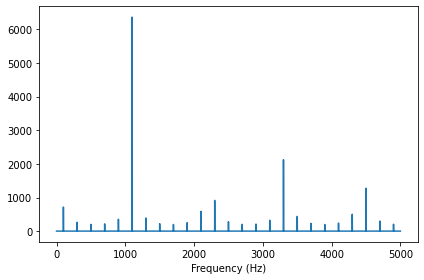

In [8]:
segment = signal.make_wave(duration=1, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Гармоники сигнала должны быть 3300, 5500, 7700, 9900 Гц и т.д. На рисунке, как и ожидалось, есть пики на 1100 и 3300 Гц, но третий пик — на 4500, а не на 5500 Гц, так как частоты выше 5000 Гц «заворачиваются» вокруг 5000 Гц. Четвертый пик находится на 2300, а не
на 7700 Гц. 


In [9]:
segment.make_audio()

# Упражнение 2.4

Был создан треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд.


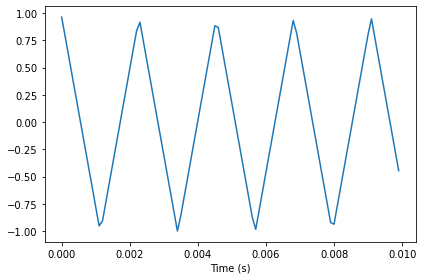

In [10]:
signal = TriangleSignal(440)
segment = signal.make_wave(duration=0.01, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

In [11]:
spectrum = segment.make_spectrum()
spectrum.hs[0]

(3.375077994860476e-14+0j)

Был создан объект Spectrum.

Амплитуда этого компонента близка к 0.

Фаза этого компонента = 0.

Каждое значение в hs соответствует частотной компоненте: размах пропорционален амплитуде соответствующей компоненты; а угол — это фаза.


Был установлен spectrum.hs[0] = 100.

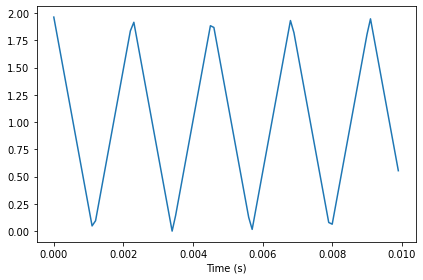

In [12]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

Как видно из полученного графика сигнал сместился по вертикали. То есть, можно сделать вывод, что первый элемент массива hs отвечает за смещение сигнала относительно вертикальной оси. Если этот элемент близок или равен нулю, то сигнал не будет смещён относительно вертикальной оси.

# Упражнение 2.5

Была написана функция, которая принимает на вход Spectrum как параметр и изменяет его делением каждого элемента hs на соответствующую частоту из fs.

In [13]:
def divide_spectrum(spectrum):
  spectrum.hs /= spectrum.fs
  spectrum.hs[0] = 0
  spectrum.plot()
  decorate(xlabel='Frequency (Hz)')

Проверим эту функцию, используя пилообразный сигнал.

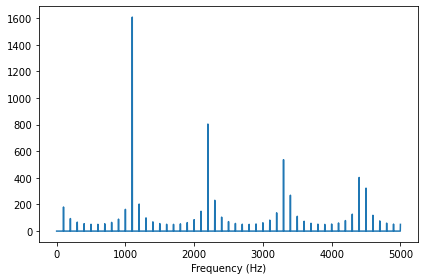

In [14]:
signal = SawtoothSignal(freq=1100)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')
wave.make_audio()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


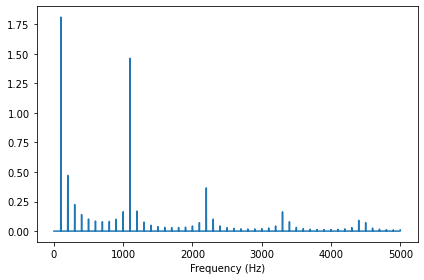

In [15]:
divide_spectrum(spectrum)
spectrum.make_wave().make_audio()

Если сравнить полученные графики, можно сделать вывод, что функция действует как фильтр низких частот: высокие частоты ощутимо ослабляются в отличии от низких.

# Упражнение 2.6

У треугольных и прямоугольных сигналов есть только нечетные гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально 1/f; гармоники треугольных сигналов — про порционально 1/(f^2).

Необходимо найти сигнал, состоящий из четных
и нечетных гармоник, спадающих пропорционально 1/(f^2).

Для этого воспользуемся следующим способов:

Создадим пилообразный сигнал (он имеет и четные, и нечетные гармоники, но спадает не пропорционально 1/(f^2)) и применим к нему функцию из предыдущего упражнения.

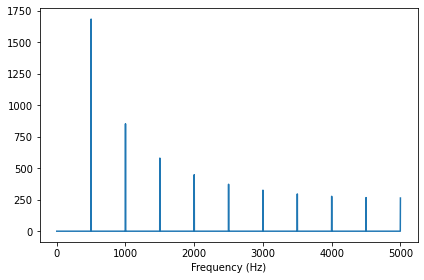

In [16]:
signal = SawtoothSignal(freq=500)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

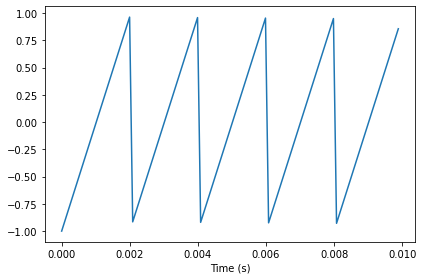

In [17]:
segment = signal.make_wave(duration=0.01)
segment.plot()
decorate(xlabel='Time (s)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


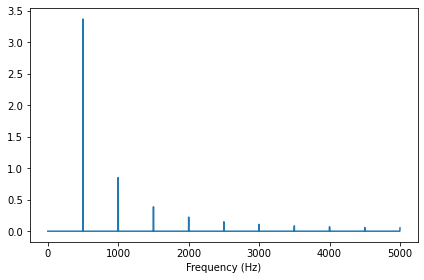

In [18]:
divide_spectrum(spectrum)

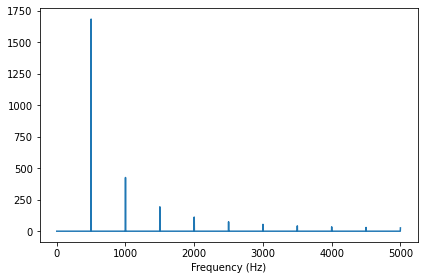

In [19]:
spectrum.scale(500)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

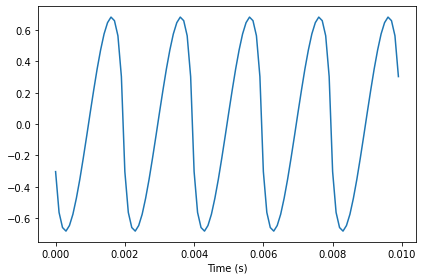

In [20]:
spectrum.make_wave().segment(duration=0.01).plot()
decorate(xlabel='Time (s)')

Полученный сигнал перестал быть пилообразным, но и не превратился в синусоидальный.